# **Analisis Predictivo de la Edad del Cangrejo 🦀**

# **Importamos Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle

# **Carga de Datos**

In [2]:
!kaggle datasets download -d sidhus/crab-age-prediction -p "D:\DataSets\CrabAge"

Dataset URL: https://www.kaggle.com/datasets/sidhus/crab-age-prediction
License(s): CC0-1.0
crab-age-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


2025-01-14 00:22:10,264 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x0000023B5B58DA10>: Failed to resolve 'www.kaggle.com' ([Errno 11001] getaddrinfo failed)")': /api/v1/datasets/metadata/sidhus/crab-age-prediction


## Vamos a descomprimir el archivo .zip, para eso vamos a utilizar python

In [3]:
import zipfile

#Ruta del archivo zip
zip_file_path = "D:/DataSets/CrabAge/crab-age-prediction.zip"

#Carpeta de destino
destination_path = "D:/DataSets/CrabAge"

#Extraer el archivo
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(destination_path)

print("Archivo descomprimido correctamente.")

Archivo descomprimido correctamente.


## Cargamos el archivo .csv

In [4]:
import os

raw_path = "D:/DataSets/CrabAge"

csv_path = os.path.join(raw_path, "CrabAgePrediction.csv")

#Verificar si el archivo existe antes de cargarlo
if os.path.exists(csv_path):
    #Cargar el archivo CSV en un dataframe
    data = pd.read_csv(csv_path)
    print("Dataframe cargado con éxito")
else:
    print(f"El archivo {csv_path} no fue encontrado.")


Dataframe cargado con éxito


## Veamos los datos en la tabla

In [5]:
data.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


# **Análisis Exploratorio**

**Descripción General**

        • ¿Qué variables están presentes?
        • ¿Cuántos registros hay en el dataset?
        • ¿Qué tipos de datos tienen las variables? (numéricos, categóricos, fechas, texto, etc.)

**Contexto del dominio**

        • ¿Qué significan las variables y cómo se relacionan con el objetivo del análisis?

## Descripción General

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


Las variables presentes en el Dataset son:
    
        • Sex (Sexo)
        • length (largo)
        • Diameter (Diametro)
        • Height (Altura)
        • Weight (Peso)
        • Shucked Weight (Peso Descascarado)
        • Viscera Weight (Peso de las Visceras)
        • Shell Weight (Peso de la Concha)
        • Age (Edad)


Cantidad de Registros y Tipos de Variables:

> Tenemos `3893` registros, en cada una de las `9` variables obtenidas.

> Todas las variables son tipo númerico en particular `Float`, excepto Sex que es de tipo `categórico`.

> En particular, la variable númerica `Age` es discreta, excepto las otras variables númericas que son continuas.

## Contexto del dominio

**Objetivo**:

> Construir un modelo preciso que permitirá a los criadores tomar decisiones más informadas sobre cuándo cosechar los cangrejos, maximizando así sus ganancias.

**Descripción de las Variables o Características:**

> - Age (Edad): Edad del cangrejo (en meses)

> - Sex (Sexo): Sexo del cangrejo; Femenino (F), masculino (M) o indeterminado (I).

> - length (largo): Largo del cangrejo (en pies; 1 pie = 30.48 cm).

> - Diameter (Diametro): Diametro del cangrejo (en pies; 1 pie = 30.48 cm).

> - Height (Altura): Altura del cangrejo (en pies; 1 pie = 30.48 cm).

> - Weight (Peso): Peso del cangrejo (en onzas; 1 libra = 16 onzas).

> - Shucked Weight (Peso Descascarado): Peso del cangrejo sin cascarón (en onzas; 1 libra = 16 onzas).

> - Viscera Weight (Peso de las Visceras): Peso de las visceras del cangrejo (en onzas; 1 libra = 16 onzas).

> - Shell Weight (Peso de la Concha): Peso del cascarón del cangrejo (en onzas; 1 libra = 16 onzas).

La varible objetivo o a predecir es `Age`


> Notemos que las variables son características de los cangrejos, que nos van ayudar a predeccir cuál es la edad correcta del cangrejo para cosecharlos.

# **Limpieza de datos**

**Valores faltantes:**

        • ¿Qué proporción de datos falta en cada variable?
        • ¿Estos valores faltantes tienen un patrón (aleatorio o no)?
        • ¿Cómo se pueden manejar (eliminación, imputación)?

**Errores o inconsistencias:**

        • ¿Existen valores que no tengan sentido o estén fuera de rango?
        • Por ejemplo, edades negativas o fechas imposibles.

**Duplicados:**

        • ¿Hay registros repetidos que deben eliminarse?

# Valores Faltantes o Nulos (NaN)

In [7]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


> Note que el dataset no tiene `valores faltantes`, cada columna tiene `3893` registros completos.

In [8]:
# Para mostrar más detalle del dataset, no es necesario
sum_nan = data.isnull().sum()
print(sum_nan)

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64


# Errores o Inscosistencias

> Veamos que en las columnas de tipo númericas no tienen valores negativos, ya que no tendrian sentido para nuestra predección.

In [9]:
# Para mostrar más detalle del dataset, no es necesario

data_copy = data.drop(columns=["Sex"])

for column in data_copy.columns:
    print(f"Valores negativos encontrados en la variable {column}:")
    print(data[data[column] < 0])


Valores negativos encontrados en la variable Length:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Diameter:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Height:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Weight:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Shucked Weight:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, Shell Weight, Age]
Index: []
Valores negativos encontrados en la variable Viscera Weight:
Empty DataFrame
Columns: [Sex, Len

In [10]:
data[data["Height"] == 0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
269,I,0.7875,0.575,0.0,3.798833,1.630096,0.807961,9.936500,6
3867,I,1.0750,0.850,0.0,12.133586,5.854172,2.438057,3.260193,8


> Note que la columna `Height` su valor minimo es cero, lo cual no tiene sentido en nuestros datos.

# Imputación de datos 

In [11]:
data.iloc[269, 3] = 0.180317
data.iloc[3867, 3] = 0.170518

In [ ]:
data[data["Height"] == 0]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


# Duplicados

In [13]:
sum_duplicados = data.duplicated().sum()
print(sum_duplicados)

0


> No tenemos registros `duplicados`

# **Estadísticas Descriptivas**

**Variables numéricas:**

        • Resumen estadístico: media, mediana, desviación estándar, percentiles.
        • Distribución: ¿Es simétrica, sesgada o tiene valores atípicos?

**Variables categóricas:**

        • Frecuencias y proporciones.
        • ¿Cuáles son las categorías dominantes y menos representadas?

**Correlaciones:**

        • ¿Qué relaciones existen entre variables numéricas?
        • Coeficientes como la correlación de Pearson o de Spearman.


# Variables Numéricas

In [14]:
data.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349464,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104751,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.025000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


> Note que la desviación estándar de `Lenght`, `Diameter` y `Height` es muy baja en comparación con las otras variables.

Recuerde!!! Que la desviación estándar es una medida de dispersión que nos induca qué tan dispersos están los datos con respecto a la media. Mientras mayor sea la desviación estándar, mayor será la dispersión de los datos.

> Note que la media y el percentil del 50% (mediana) son aproxidamente iguales, podemos decir que nuestros datos conservcan una distribución más o menos simétrica.

obs!! Veamos que min en `Height` es cero, tendria sentido ese valor pa nuestra predección?


Obs!!!

- Sesgo Positivo (a la derecha): La cola derecha es más larga.

    > Si la media > mediana, entonces el sesgo es positivo.

- Sesgo Negativo (a la izquierda): La cola izquierda es más larga.

    > Si la media < mediana, entonces el sesgo es negativo.

Lo podemos evidenciar en la siguiente figura.


<function matplotlib.pyplot.show(close=None, block=None)>

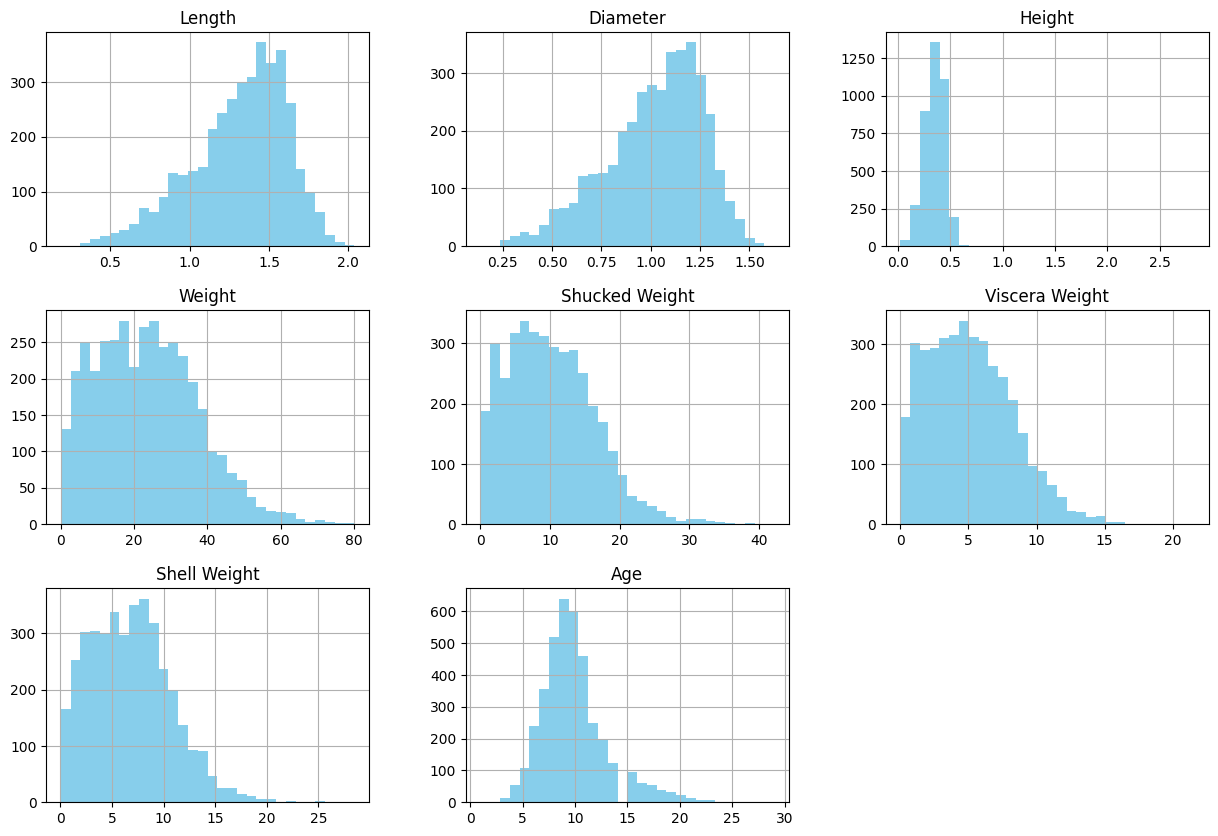

In [15]:
data.hist(bins = 30, color = "Skyblue",  figsize=(15, 10))
plt.show

**Calculamos el sesgo de cada columna**

        - Cerca de 0: Simétrica.
        - Positivo: Sesgo a la derecha.
        - Negativo: Sesgo a la izquierda.

In [21]:
# Cálculo del sesgo estadístico

from scipy.stats import skew

sesgo = skew(data_copy)
columns = data_copy.columns


for i in range(0, len(sesgo)):
    print(f"{columns[i]}: {sesgo[i]:.5f}")


Length: -0.65086
Diameter: -0.61716
Height: 3.34858
Weight: 0.51870
Shucked Weight: 0.70284
Viscera Weight: 0.57807
Shell Weight: 0.60748
Age: 1.10428


# Variables categóricas

> Solo tenemos una variable categórica que corresponde a `Sex`

In [22]:
data.describe(include = object)

,Sex
count,3893
unique,3
top,M
freq,1435


Mostremos las diferentes cantidades de cada tipo de sexo en cangrejos

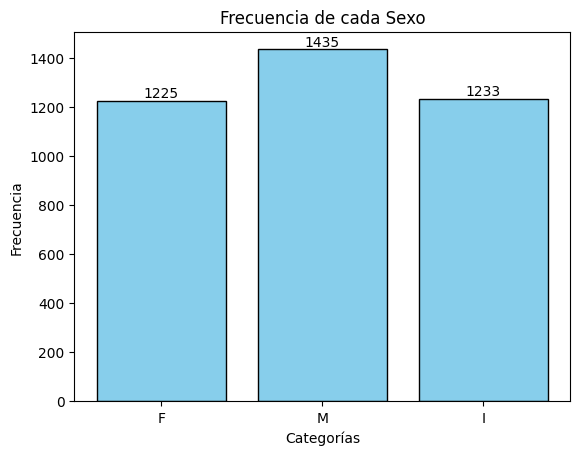

In [23]:
from collections import Counter # para que nos obtenga las distintas catergorias y el número total de cada una


counts = Counter(data["Sex"]) # Nos devuelve un diccionario
categories  = list(counts.keys())
frequencies = list(counts.values())

plt.bar(categories, frequencies, color = "Skyblue", edgecolor = "black")

for i, freq in enumerate(frequencies):
    plt.text(i, freq + 0.2, str(freq), ha = "center", va = "bottom")


plt.title("Frecuencia de cada Sexo")
plt.xlabel("Categorías")
plt.ylabel("Frecuencia")

plt.show()


> Notemos que hay más cangrejos de sexo masculino.

> En cambio en femenino e indeterminado tenemos aproxidamente la misma proporción.

# Análisis y Tratamiento de Valores Atípicos

# Correlaciones

### Vamos a crear una tabla de correlaciones entre las variables númericas

In [24]:
# No es necesario, con un mapa de calor estaria bien
data_copy = data.drop(columns=["Sex"])
data_copy.corr()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.986653,0.823748,0.925374,0.898181,0.903253,0.897736,0.554973
Diameter,0.986653,1.000000,0.830230,0.925770,0.893626,0.899810,0.905561,0.573844
Height,0.823748,0.830230,1.000000,0.815180,0.771722,0.793995,0.814012,0.552345
Weight,0.925374,0.925770,0.815180,1.000000,0.969077,0.965583,0.955269,0.538819
Shucked Weight,0.898181,0.893626,0.771722,0.969077,1.000000,0.931280,0.882406,0.418760
Viscera Weight,0.903253,0.899810,0.793995,0.965583,0.931280,1.000000,0.906105,0.501328
Shell Weight,0.897736,0.905561,0.814012,0.955269,0.882406,0.906105,1.000000,0.625195
Age,0.554973,0.573844,0.552345,0.538819,0.418760,0.501328,0.625195,1.000000


### Para visualizar mejor la información, vamos a crear un mapa de calor

<Axes: >

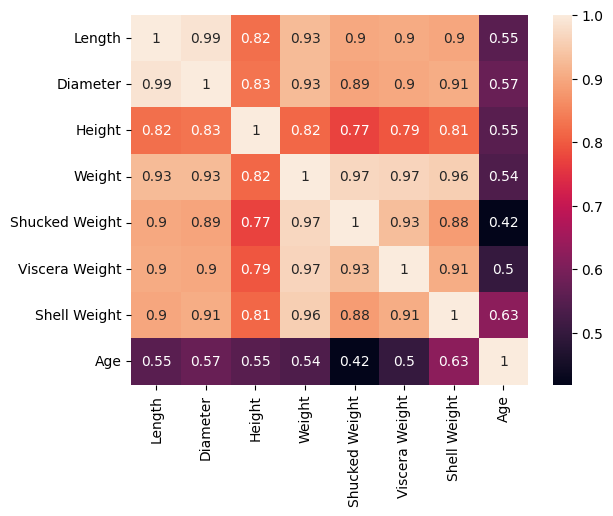

In [25]:
sns.heatmap(data_copy.corr(method="pearson"), annot = True ) # por defecto el metodo de corr() es pearson

Note que las variables que tienen más correlación con nuestra variable objetivo `Age` son:
        
        • Shell Weight
        • Diameter
        • Height
        • Lenght
        • Weight
        • Viscera Weight

Note que hay variables que tienen una correlación muy alta respecto a las otras variables, por ejemplo algunas son: 

        • length
        • Diameter

Al que estas varibles tenga una correlación tan cercana a `1` (una correlación positiva), nos indica que entre más aumente una variable la otra tambien va a crecer ya que tienen una correlación alta. Ejemplo, entre más diametro tenga va a ser más largo el cangrejo.




### Vamos a comparar nuestra variable objetivo (Age) con la distintas varaibles presentes en el Dataset

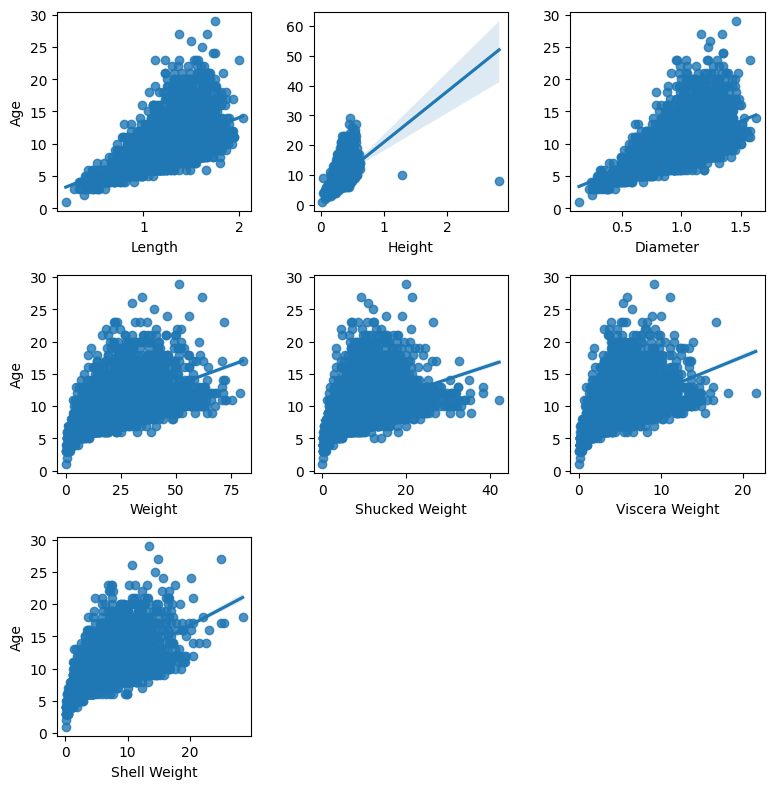

In [26]:
fig, axis = plt.subplots(3, 3, figsize = (8, 8))

#Crear un diagrama de dispersión multiple
sns.regplot(ax = axis[0,0], data = data, x = "Length", y = "Age")
sns.regplot(ax = axis[0,1], data = data, x = "Height", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[0,2], data = data , x = "Diameter", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[1,0], data = data, x = "Weight", y = "Age")
sns.regplot(ax = axis[1,1], data = data, x = "Shucked Weight", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[1,2], data = data, x = "Viscera Weight", y = "Age").set(ylabel = None)
sns.regplot(ax = axis[2,0], data = data, x = "Shell Weight", y = "Age")

#Ajustar el layout
plt.tight_layout()
plt.delaxes(axis[2,1])
plt.delaxes(axis[2,2])

#Mostrar el plot
plt.show()

> Observemos que la correspondencia entre las variables númericas de los cangrejos respecto a la variable objetivo (Age) es `lineal`.

> Esto es, que a medida que la variable del X aumenta, la variable del eje Y (Age) también aumenta, no necesariamente con todas las variables.

> A excepción de la variable `height`, ya que no aumenta tanto en el eje X pero si en el eje Y.

> Las ultimas cuatro graficas no son tan lineales

### Detallemos más de cerca que esta pasando con Weight respecto a Age

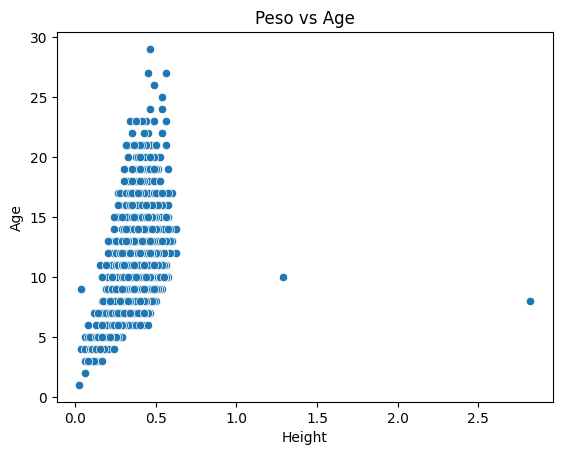

In [27]:
sns.scatterplot(x='Height', y='Age', data=data)
plt.title("Peso vs Age")
plt.show()

> No necesariamente entre más altura tenga el cangrejo mayor va a ser su edad.

# **Preparacion de Datos**

# One Hot Encoding

> Nuestra variable categorica `Sex` vamos a darle valores numéricos, para esto vamos a utilizar `one hot encoding`

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
encoder = OneHotEncoder(sparse_output = False)

In [30]:
encoded_data = encoder.fit_transform(data[["Sex"]])
encoded_data

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], shape=(3893, 3))

In [31]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(["Sex"]))
encoded_df

,Sex_F,Sex_I,Sex_M
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
3888,1.0,0.0,0.0
3889,1.0,0.0,0.0
3890,0.0,1.0,0.0
3891,0.0,1.0,0.0


In [32]:
data = pd.concat([data, encoded_df], axis=1)

data.drop("Sex", axis = 1, inplace=True)
data

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,1.0,0.0,0.0
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,1.0,0.0,0.0
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,0.0,1.0,0.0
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,0.0,1.0,0.0


In [33]:
df_clear = data

In [34]:
df_clear.to_csv("D:/DataSets/CrabAge/data_clear.csv")

In [35]:
df_clear.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1.0,0.0,0.0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0.0,0.0,1.0
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0.0,1.0,0.0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1.0,0.0,0.0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0.0,1.0,0.0


# Modelado

# Validación

# Despliegue